In [1]:
import processing_functions as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
import scipy.stats as stats
import scipy.optimize as opt
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [2]:
lc01 = '/home/ravioli/astro/ksp/grb/data-0.1s/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc'
lc01_data = pf.openlc(lc01)
max_01 = int(np.where(lc01_data['RATE'] == np.max(lc01_data['RATE']))[0])
start_01 = max_01-1100
end_01 = max_01+220

lc1 = '/home/ravioli/astro/ksp/grb/data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc'
lc1_data = pf.openlc(lc1)
max_1 = int(np.where(lc1_data['RATE'] == np.max(lc1_data['RATE']))[0])
start_1 = max_1-110
end_1 = max_1+22

lc10 = '/home/ravioli/astro/ksp/grb/data-10s/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc'
lc10_data = pf.openlc(lc10)
max_10 = int(np.where(lc10_data['RATE'] == np.max(lc10_data['RATE']))[0])
start_10 = max_10-12
end_10 = max_10+4

In [3]:
snr_01_gauss, n_01_gauss, bin_center_01_gauss, popt_01_gauss = pf.snr_gauss(lc01, start_01, end_01, in_bins=500, window=1001)
snr_1_gauss, n_1_gauss, bin_center_1_gauss, popt_1_gauss = pf.snr_gauss(lc1, start_1, end_1)
snr_10_gauss, n_10_gauss, bin_center_10_gauss, popt_10_gauss = pf.snr_gauss(lc10, start_10, end_10, in_bins=50, window=11)

snr_01_poiss, n_01_poiss, bin_center_01_poiss, popt_01_poiss = pf.snr_poisson(lc01, start_01, end_01, in_bins=500, window=1001)
snr_1_poiss, n_1_poiss, bin_center_1_poiss, popt_1_poiss = pf.snr_poisson(lc1, start_1, end_1)
snr_10_poiss, n_10_poiss, bin_center_10_poiss, popt_10_poiss = pf.snr_poisson(lc10, start_10, end_10, in_bins=50, window=11)

snr_01_gamma, n_01_gamma, bin_center_01_gamma, gamma_fit_01, popt_01_gamma = pf.snr_gamma(lc01, start_01, end_01, in_bins=500, window=1001)
snr_1_gamma, n_1_gamma, bin_center_1_gamma, gamma_fit_1, popt_1_gamma = pf.snr_gamma(lc1, start_1, end_1)
snr_10_gamma, n_10_gamma, bin_center_10_gamma, gamma_fit_10, popt_10_gamma = pf.snr_gamma(lc10, start_10, end_10, in_bins=50, window=11)

snr_01_skewnorm, *_ = pf.snr_skewnorm(lc01, start_01, end_01, in_bins=500, window=1001)
snr_1_skewnorm, *_ = pf.snr_skewnorm(lc1, start_1, end_1)
snr_10_skewnorm, *_ = pf.snr_skewnorm(lc10, start_10, end_10, in_bins=50, window=11)

snr_01_counts = pf.snr_counts(lc01, start_01, end_01, window=1001)
snr_1_counts = pf.snr_counts(lc1, start_1, end_1)
snr_10_counts = pf.snr_counts(lc10, start_10, end_10, window=11)

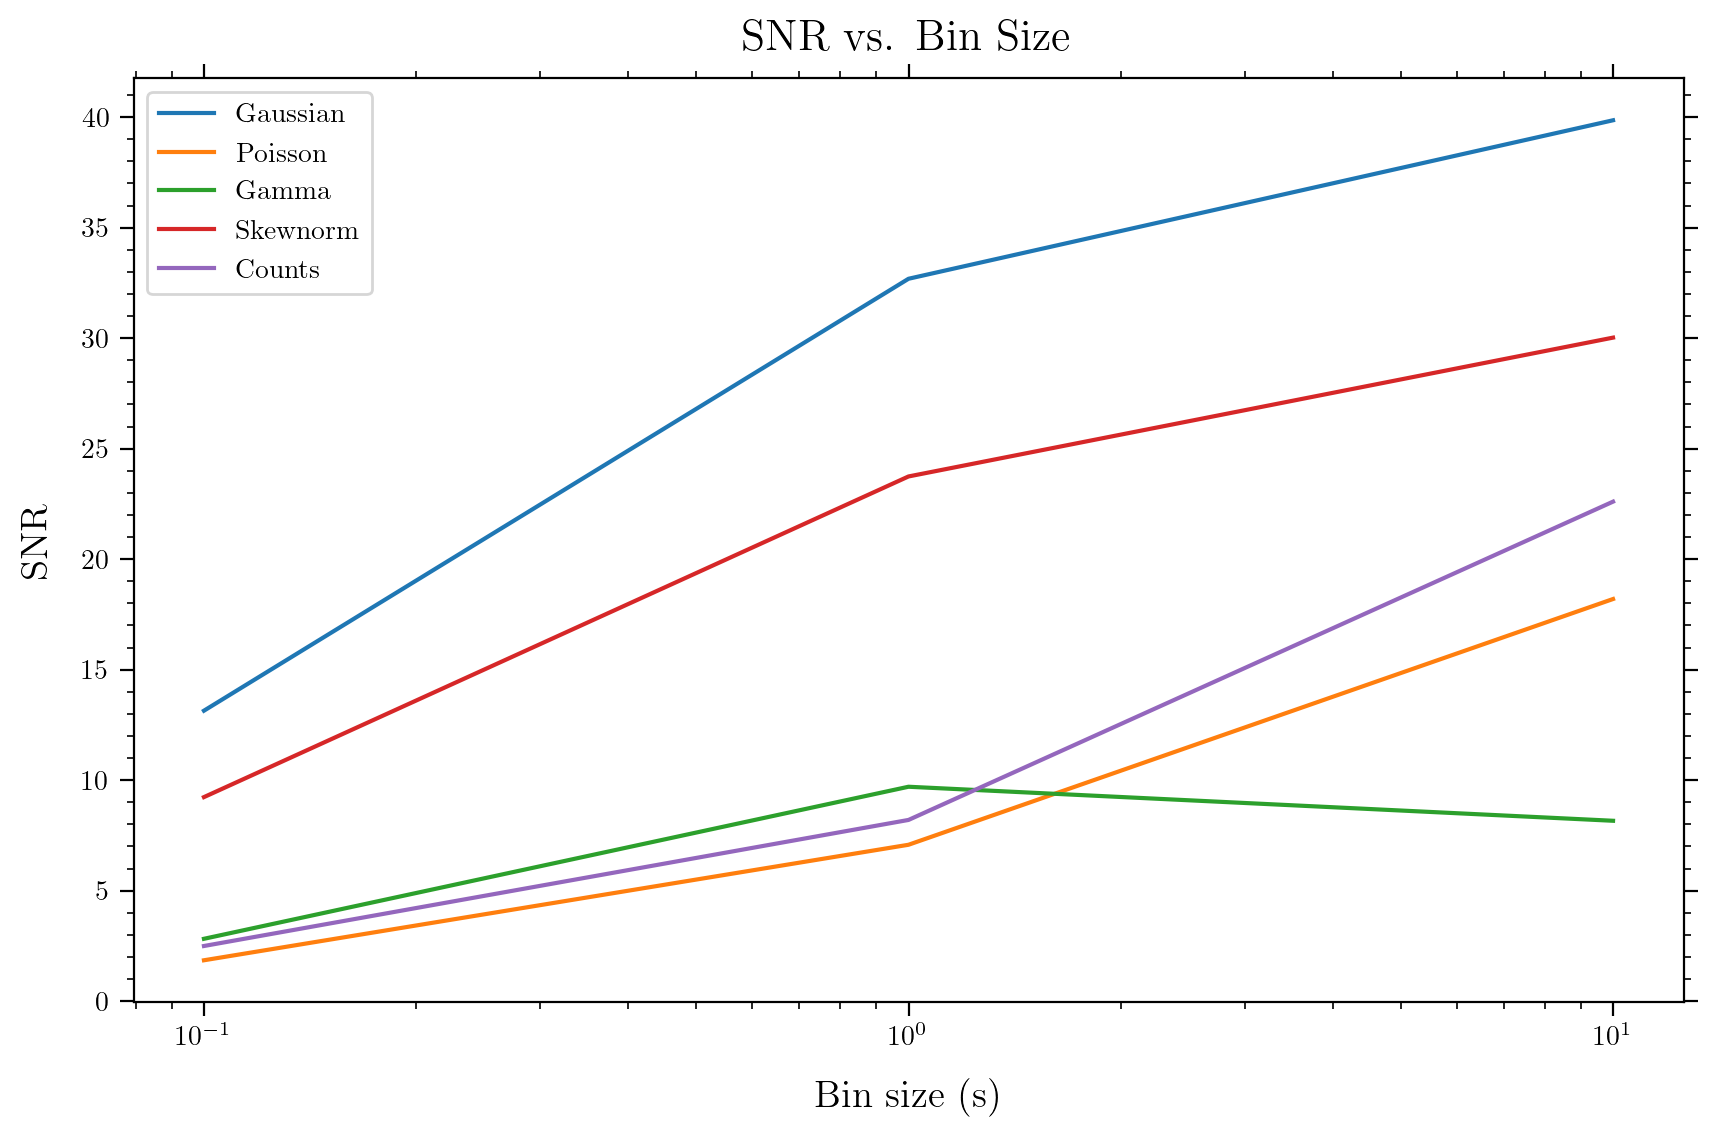

In [4]:
snr_gauss = np.array([snr_01_gauss, snr_1_gauss, snr_10_gauss])
snr_poiss = np.array([snr_01_poiss, snr_1_poiss, snr_10_poiss])
snr_gamma = np.array([snr_01_gamma, snr_1_gamma, snr_10_gamma])
snr_skewnorm = np.array([snr_01_skewnorm, snr_1_skewnorm, snr_10_skewnorm])
snr_counts = np.array([snr_01_counts, snr_1_counts, snr_10_counts])

bins = np.array([0.1, 1, 10])

plt.figure(figsize=(10,6), dpi=200)
plt.plot(bins, snr_gauss, label='Gaussian')
plt.plot(bins, snr_poiss, label='Poisson')
plt.plot(bins, snr_gamma, label='Gamma')
plt.plot(bins, snr_skewnorm, label='Skewnorm')
plt.plot(bins, snr_counts, label='Counts')
plt.xscale('log')
plt.xlabel('Bin size (s)', labelpad=10, fontsize=14)
plt.ylabel('SNR', labelpad=10, fontsize=14)
plt.title('SNR vs. Bin Size', fontsize=16, pad=10)
plt.legend()
plt.show()